Importando bibliotecas necessárias

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Função para abertura do arquivo da imagem

In [62]:
def open_image(image_path):
    try:
        img = Image.open(image_path)
        img_array = np.array(img)  # Converte imagem para um array
        
        if len(img_array.shape) != 3 or img_array.shape[2] != 3:  # Checa se imagem é RGB
            print("Erro: Imagem não é RGB")
            return None
        
        else:
            return img, img_array
        
    except FileNotFoundError:
        print(f"Arquivo {image_path} não encontrado")
        return None
    
    except Exception as e:
        print(f"O erro {e} ocorreu")
        return None
    

Informações da imagem

In [63]:
print(open_image("golfGTI.png")[0])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3926x2136 at 0x2E622B6BDC0>


Matriz da imagem

In [64]:
print(open_image("golfGTI.png")[1])

[[[ 77 101 101]
  [ 77 101 101]
  [ 77 101 101]
  ...
  [  8  12  13]
  [  7  11  12]
  [  7  11  12]]

 [[ 72  96  96]
  [ 73  97  97]
  [ 74  98  98]
  ...
  [  9  13  14]
  [  8  12  13]
  [  8  12  13]]

 [[ 69  95  94]
  [ 71  97  96]
  [ 72  98  97]
  ...
  [  9  13  12]
  [  9  13  12]
  [  8  12  11]]

 ...

 [[ 62  66  75]
  [ 62  66  75]
  [ 63  67  76]
  ...
  [ 70  76  88]
  [ 70  76  88]
  [ 70  76  88]]

 [[ 61  65  74]
  [ 62  66  75]
  [ 63  67  76]
  ...
  [ 70  76  88]
  [ 70  76  88]
  [ 70  76  88]]

 [[ 61  65  74]
  [ 62  66  75]
  [ 63  67  76]
  ...
  [ 70  76  88]
  [ 70  76  88]
  [ 70  76  88]]]


Dimensões da imagem

In [65]:
img_array = open_image("golfGTI.png")[1]

In [66]:
def get_dimensoes(img_array):
    height, width, _ = img_array.shape
    return height, width

In [67]:
height = get_dimensoes(img_array)[0]
width = get_dimensoes(img_array)[1]
print(f"Altura: {height}\nLargura: {width}")

Altura: 2136
Largura: 3926


Criando uma matriz de zeros para a nova imagem em escalas de cinza

In [68]:
def return_gray_img(height, width):
    return np.zeros((height, width), dtype=np.uint32)

Convertendo imagem para escalas de cinza
* Utilizada fórmula (R + G + B) / 3
* Dessa forma é utilizada a média simples, utilizando a média ponderada haveria uma percepção melhor da escala de cinza

In [69]:
def convertendo_cinza(height, width, img_array, gray_image):
    for i in range(height):
        for j in range(width):
            gray_image[i, j] = (img_array[i, j, 0].astype(int) + img_array[i, j, 1] + img_array[i, j, 2]) // 3   # Primeiro valor em inteiro para não estourar o limite de 255
    return gray_image

In [70]:
gray_image = convertendo_cinza(height, width, img_array, return_gray_img(height, width))
print(gray_image)

[[93 93 93 ... 11 10 10]
 [88 89 90 ... 12 11 11]
 [86 88 89 ... 11 11 10]
 ...
 [67 67 68 ... 78 78 78]
 [66 67 68 ... 78 78 78]
 [66 67 68 ... 78 78 78]]


Comparando imagens

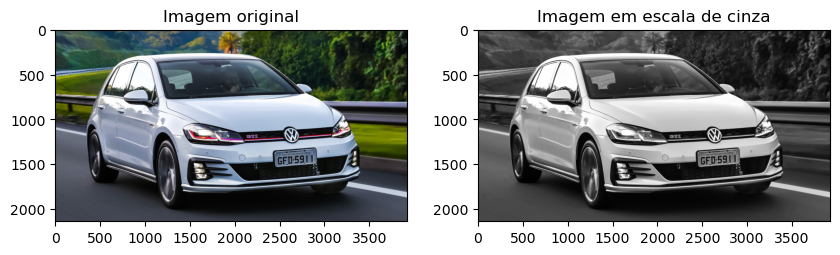

In [71]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(open_image("golfGTI.png")[0])
plt.title("Imagem original")

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap="gray")  # Necessário colocar o cmap devido a froma como o matplotlib lida com o colormap
plt.title("Imagem em escala de cinza")

plt.show()


Convertendo de escala de cinza para binária
* A imagem só pode ter dois valores de pixel, preto (0) e branco (1)
* Para isso é definido um limiar (threshold), que por padrão é 127 o ponto médio entre 0 e 255 
* Se o valor de um pixel em escala de cinza for maior que o limiar, ele passa e se torna branco. Em caso contrário, se tornará preto

In [72]:
# Adicione esta célula ao seu código para diagnosticar o problema
if 'gray_image' in locals():
    print(f"Tipo de dado da imagem cinza: {gray_image.dtype}")
    print(f"Valor mínimo do pixel: {gray_image.min()}")
    print(f"Valor máximo do pixel: {gray_image.max()}")
else:
    print("A variável 'gray_image' não foi encontrada. Execute a conversão primeiro.")

Tipo de dado da imagem cinza: uint32
Valor mínimo do pixel: 0
Valor máximo do pixel: 255


In [73]:
# Definindo threshold
THRESHOLD = 127
def return_binary_img(height, width):
    return np.zeros((height, width), dtype=np.uint8)

Gernado matriz binária que forma imagem

In [74]:
def convertendo_binario(height, width, gray_image, binary_img):
    for i in range(height):
        for j in range(width):
            if gray_image[i, j] > THRESHOLD:
                binary_img[i, j] = 255
            else:
                binary_img[i, j] = 0
            
    
    return binary_img

In [75]:
binary_img = convertendo_binario(height, width, gray_image, return_binary_img(height, width))

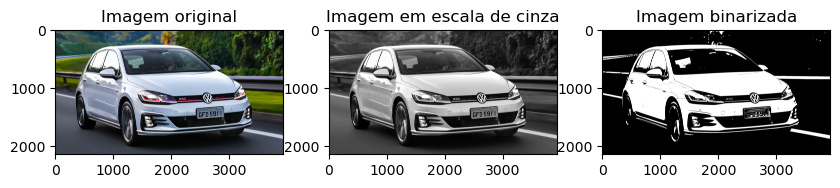

In [76]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(open_image("golfGTI.png")[0])
plt.title("Imagem original")

plt.subplot(1,3,2)
plt.imshow(gray_image, cmap="gray")  # Necessário colocar o cmap devido a froma como o matplotlib lida com o colormap
plt.title("Imagem em escala de cinza")

plt.subplot(1,3,3)
plt.imshow(binary_img, cmap="gray")
plt.title("Imagem binarizada")

plt.show()